Fashion-MNIST 데이터셋 다운로드 받기

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


데이터 그려보기

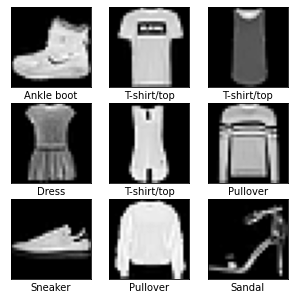

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

전처리 및 검증 데이터셋 만들기

In [ ]:
# 값의 범위를 0 ~ 1로 만들어줍니다.
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터 세트를 만듭니다.
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다. 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

첫 번째 모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
first_model.add(Flatten(input_shape = (28, 28))) # (28, 28) -> .(28 * 28)
first_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
first_model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
first_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

학습 과정 설정

In [ ]:
first_model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy 다중선택을 하기 때문에 선택
              metrics=['acc']) # 모니터링 할 평가지표 : acc

모델 학습하기

In [ ]:
first_history = first_model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.6925 - acc: 0.7667 - val_loss: 0.4710 - val_acc: 0.8369
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4364 - acc: 0.8465 - val_loss: 0.4171 - val_acc: 0.8538
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3922 - acc: 0.8609 - val_loss: 0.3943 - val_acc: 0.8592
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3656 - acc: 0.8685 - val_loss: 0.3755 - val_acc: 0.8668
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3489 - acc: 0.8755 - val_loss: 0.3683 - val_acc: 0.8696
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3279 - acc: 0.8805 - val_loss: 0.3573 - val_acc: 0.8721
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3182 - acc: 0.8863 - val_loss: 0.3710 - val_acc: 0.8681
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

모델 평가하기

In [ ]:
first_model.evaluate(x_test, y_test)
# loss : 0.391 - acc : 0.875

313/313 [==============================] - 0s 904us/step - loss: 0.3919 - acc: 0.8752


[0.3919004201889038, 0.8751999735832214]

## 두번째 모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

second_model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
second_model.add(Flatten(input_shape = (28, 28))) # (28, 28) -> .(28 * 28)
second_model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층을 추가합니다.
second_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
second_model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
second_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망


두번째 모델 설정하기

In [ ]:
second_model.compile(optimizer='adam', # 옵티마이저: Adam
              loss = 'categorical_crossentropy', # 손실 함수: categorical_crossentropy
              metrics=['acc']) # 모니터링 할 평가지표: acc(정확도)

두번째 모델 학습하기

In [ ]:
second_history = second_model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val))


Epoch 1/30
329/329 [==============================] - 1s 4ms/step - loss: 0.6591 - acc: 0.7705 - val_loss: 0.4393 - val_acc: 0.8484
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4260 - acc: 0.8491 - val_loss: 0.4054 - val_acc: 0.8562
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3832 - acc: 0.8616 - val_loss: 0.3861 - val_acc: 0.8642
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3513 - acc: 0.8723 - val_loss: 0.3647 - val_acc: 0.8693
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3307 - acc: 0.8795 - val_loss: 0.3511 - val_acc: 0.8751
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3155 - acc: 0.8837 - val_loss: 0.3337 - val_acc: 0.8801
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2987 - acc: 0.8893 - val_loss: 0.3371 - val_acc: 0.8787
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

두번째 모델 평가하기

In [ ]:
second_model.evaluate(x_test, y_test)

# loss : 0.407 acc : 0.881

313/313 [==============================] - 0s 1ms/step - loss: 0.4074 - acc: 0.8815


[0.4074159264564514, 0.8815000057220459]

두 모델의 학습 과정 그려보기

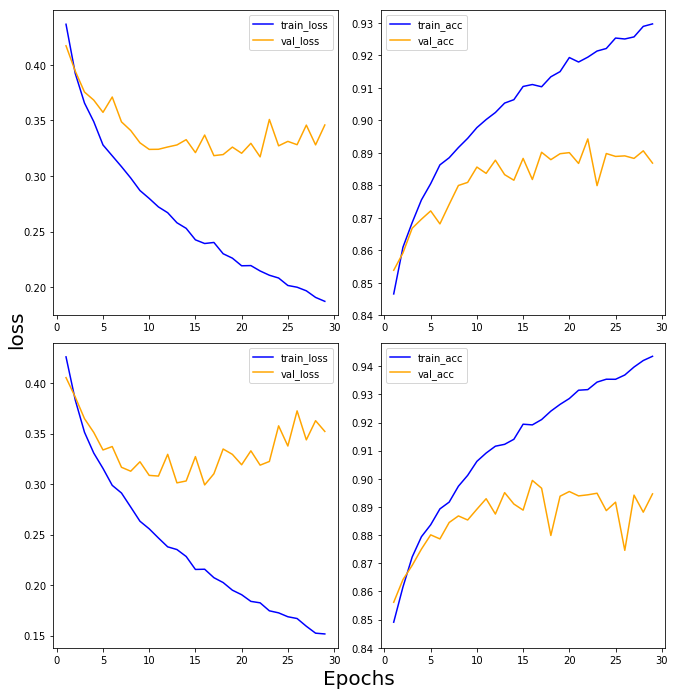

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
     
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)

# first : loss : 0.391 - acc : 0.875
# second : loss : 0.407 - acc : 0.881